## Algoritmos de Clasificación

1. Objetivo: Clasificar si una mujer con las mismas condiciones del dataset puede tener diabetes, tomando en cuenta las mismas características mediadas en el dataset

2. Datos: Archivo CSV dado en la URL: "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv"

In [23]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
#Cuantas clases hay
print(data['Outcome'].unique())
print(data['Outcome'].value_counts())
# Balance: misma cantidad de registros en cada clase

[1 0]
Outcome
0    500
1    268
Name: count, dtype: int64


In [27]:
#Valores lógicos/nulos
print(f"Valores existentes en Glucose: \n {data['Glucose'].unique()}")
data.describe()

Valores existentes en Glucose: 
 [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## ¿Qué hacer ante datos nulos/faltantes?
- Imputar datos (media/moda/frecuencia)
- Eliminar registros (cuando no tenemos la clase asignada/Cuando faltan muchas características)

## EDA (Estadística)

In [28]:
#Dividimos el conjunto de datos en entrenamiento y validación
X = data.drop('Outcome', axis=1) #Matriz X de entrada -> Variables independientes
y = data['Outcome'] #Vector de salida Y -> Variable dependiente

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
#Normalización/estandarización de los datos (u = 0, std= 1)
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
xtrain = escalador.fit_transform(xtrain)
xtest = escalador.fit_transform(xtest)

## Modelo

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

regresion_logistica = LogisticRegression() 

#Entrenar el modelo 
regresion_logistica.fit(xtrain, ytrain)


LogisticRegression()

## Validar el modelo

In [31]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

ypred = regresion_logistica.predict(xtest)

print(f"La exactitud del modelo es: \n {accuracy_score(ypred, ytest):.2f}")
print(f"La precision del modelo es: \n {precision_score(ypred, ytest):.2f}")
print(f" F1 score es: \n {f1_score(ypred, ytest):.2f}")

La exactitud del modelo es: 
 0.74
La precision del modelo es: 
 0.52
 F1 score es: 
 0.58


In [32]:
modelos = {'Regresión logística': LogisticRegression(), 'Bayes':GaussianNB(), 
           'KNN':KNeighborsClassifier(n_neighbors=5), 'SVM': SVC()}
for nombre, modelo in modelos.items():
    
    #entrenamiento
    modelo.fit(xtrain, ytrain)
    
    #Predicción
    y_pred = modelo.predict(xtest)
    
    #Validación
    print(nombre)
    print(f"La exactitud del modelo es: {accuracy_score(y_pred, ytest):.2f}")
    print(f"La precision del modelo es: {precision_score(y_pred, ytest):.2f}")
    print(f"F1 score es: {f1_score(y_pred, ytest):.2f}")
    

Regresión logística
La exactitud del modelo es: 0.74
La precision del modelo es: 0.52
F1 score es: 0.58
Bayes
La exactitud del modelo es: 0.76
La precision del modelo es: 0.59
F1 score es: 0.63
KNN
La exactitud del modelo es: 0.73
La precision del modelo es: 0.51
F1 score es: 0.57
SVM
La exactitud del modelo es: 0.75
La precision del modelo es: 0.56
F1 score es: 0.61


### Análisis del conjunto de validación (xtest)

In [ ]:
xtest[1:3, :]# ¿Conjunto de test es siempre el mismo?

array([[-0.59092098, -0.28934861,  0.32999837,  0.66112249, -0.69104306,
         0.43377686, -1.07730552, -1.05908052],
       [-0.59092098, -0.41794799, -0.17121254, -1.2243009 , -0.69104306,
        -0.14570152, -1.04450327, -1.05908052]])

#### Validación cruzada

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

modelos = {'Regresión logística': LogisticRegression(), 'Bayes':GaussianNB(), 
           'KNN':KNeighborsClassifier(n_neighbors=7), 'SVM': SVC(C=1.5)}

#Entrenamiento
print("Entrenamiento - Ratio: 0.7")
for nombre, modelo in modelos.items():
    #Aplicación de nuestra validación cruzada estratificada
    kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    cross_val = cross_val_score(modelo, xtrain, ytrain, cv=kfold, scoring='precision')
    print(f"{nombre} - precisión_media: {cross_val.mean():.2f} - precisión_std: {cross_val.std():.2f}")

#Validación
print("Validación - Ratio: 0.3 ")
for nombre, modelo in modelos.items():
    #Aplicación de nuestra validación cruzada estratificada
    kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    cross_val = cross_val_score(modelo, xtest, ytest, cv=kfold, scoring='precision')
    print(f"{nombre} - precisión_media: {cross_val.mean():.2f} - precisión_std: {cross_val.std():.2f}")

Entrenamiento - Ratio: 0.7
Regresión logística - precisión_media: 0.75 - precisión_std: 0.13
Bayes - precisión_media: 0.69 - precisión_std: 0.09
KNN - precisión_media: 0.65 - precisión_std: 0.12
SVM - precisión_media: 0.71 - precisión_std: 0.11
Validación - Ratio: 0.3 
Regresión logística - precisión_media: 0.72 - precisión_std: 0.20
Bayes - precisión_media: 0.64 - precisión_std: 0.18
KNN - precisión_media: 0.61 - precisión_std: 0.14
SVM - precisión_media: 0.73 - precisión_std: 0.18


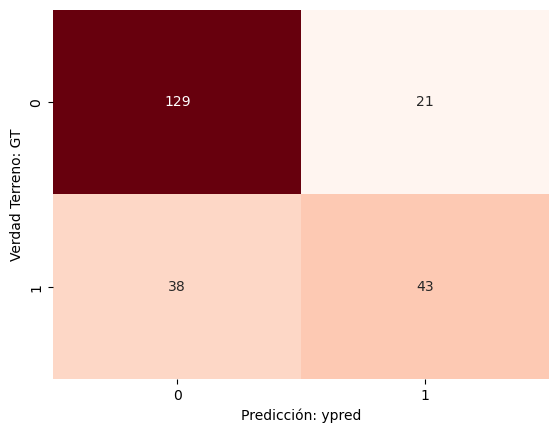

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
var = [1, 10, 100, 1000]
resultado =  []
for i in range(var):
    modelo = SVC(C = var[i])
    modelo.fit(xtrain, ytrain) #np array
    svc_pred = modelo.predict(xtest) #np array
    cm = confusion_matrix(ytest, svc_pred)
    resultado.append()

#Matriz de confusión
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("Predicción: ypred")
plt.ylabel("Verdad Terreno: GT")
plt.show()


In [53]:
resultado =classification_report(ytest, svc_pred)
print(resultado)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
¿Cómo trabajar con el desbalance de los datos? Oversampling, Subsampling, SMOTE

In [ ]:
IA

50% - 1h
60% - 1d
70% - 1semana
80% - 1mes
90% - 6meses
95% - 1-2años
98% - 2años<